In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [5]:
import netCDF4 as nc
import pickle as pk
import statistics as st
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [6]:
# import data 
bcfile = "/d1/enrique/NWA_bdry_SODA3.3.1_y2012.nc"
bcds = nc.Dataset(bcfile)

# temperature 
pTs = bcds.variables['temp_south']
pTe = bcds.variables['temp_east']

# salinity
Ss = bcds.variables['salt_south'][:]
Se = bcds.variables['salt_east'][:]

In [12]:
# CONVERT FROM POTENTIAL TO ABS TEMP

# did it in Matlab
# import that file

x = loadmat('absT.mat')
Te = x['Te']
Ts = x['Ts']

Te.shape

(73, 40, 362)

Text(0, 0.5, 'absolute temp')

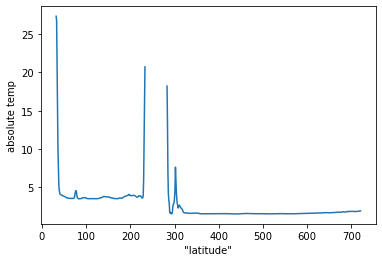

In [20]:
d1 = Ts[0, 0,:]

plt.figure()
plt.plot(d1)
plt.xlabel('"latitude"')
plt.ylabel("absolute temp")


In [21]:
# normalize predictor variables
Tm = 13.1856
Tstd = 5.1979

Sm = 34.4037
Sstd = 1.4914

#O2m = 214.6618
#O2s = 44.6693

Ten = (Te-Tm)/Tstd
Sen = (Se-Sm)/Sstd

Tsn = (Ts-Tm)/Tstd
Ssn = (Ss-Sm)/Sstd
#O2n = (do-O2m)/O2s

In [32]:
#np.nanstd(Ssn)
#np.nanstd(Sen)
np.nanstd(Tsn)
#np.nanstd(Ten)

1.7711462555555944

In [35]:
# these seem equivalent

#print(np.isnan(Tsn))
#print(np.ma.getmask(Sn))

In [23]:
#np.nanmean(Tn, axis=None)
np.nanmean(Sen, axis=None)

0.08483359838321501

In [38]:
# calculate empirical model DIC and TA

# DIC empirical model coefficients
a0=2103.3
a1=-56.408
a2=58.347
a3=-7.2612

DICe = a0 + a1*Ten + a2*Sen + a3*Ten*Sen
DICs = a0 + a1*Tsn + a2*Ssn + a3*Tsn*Ssn

#np.nanmean(DIC, axis=None)
#DIC.shape

In [39]:
Sen.shape

(73, 40, 362)

In [40]:
# TA coefs
b0=2289.4;
b1=0.75761;
b2=69.15;

TAe = b0 + b1*Ten + b2*Sen;
TAs = b0 + b1*Tsn + b2*Ssn;

#np.nanmean(TA, axis=None)
#DIC.shape

In [41]:
with open("TA.p", "wb") as f:
    pk.dump([TAe, TAs], f)   
    
with open("DIC.p", "wb") as f:
    pk.dump([DICe, DICs], f)

In [42]:
bcds.dimensions

OrderedDict([('s_rho',
              <class 'netCDF4._netCDF4.Dimension'>: name = 's_rho', size = 40),
             ('s_w',
              <class 'netCDF4._netCDF4.Dimension'>: name = 's_w', size = 41),
             ('eta_rho',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'eta_rho', size = 362),
             ('xi_rho',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'xi_rho', size = 722),
             ('ocean_time',
              <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'ocean_time', size = 73),
             ('eta_psi',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'eta_psi', size = 361),
             ('xi_psi',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'xi_psi', size = 721),
             ('eta_u',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'eta_u', size = 362),
             ('xi_u',
              <class 'netCDF4._netCDF4.Dimension'>: name = 'xi_u', size = 721),
             ('eta_v',
              <c